In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pyclouds.imports import *

In [3]:
# Necessary for some reason to have pandas work properly. Probably version mismatch...
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [5]:
IMGDIR = '/local/S.Rasp/cloud-classification/'

In [8]:
clas_prac = pd.read_pickle('../../preprocessed_data_original/clas_prac.pkl')
clas_full = pd.read_pickle('../../preprocessed_data_original/clas_full.pkl')
annos_prac = pd.read_pickle('../../preprocessed_data_original/annos_prac.pkl')
annos_full = pd.read_pickle('../../preprocessed_data_original/annos_full.pkl')

In [9]:
seg_dir = '/project/meteo/work/S.Rasp/cloud-classification/ml/seg_valid/'

In [12]:
!ls $seg_dir | head

Aqua_CorrectedReflectance20070108_159-180_8-22.png
Aqua_CorrectedReflectance20070114_159-180_8-22.png
Aqua_CorrectedReflectance20070127_159-180_8-22.png
Aqua_CorrectedReflectance20070131_159-180_8-22.png
Aqua_CorrectedReflectance20070203_159-180_8-22.png
Aqua_CorrectedReflectance20070209_159-180_8-22.png
Aqua_CorrectedReflectance20071222_159-180_8-22.png
Aqua_CorrectedReflectance20071231_159-180_8-22.png
Aqua_CorrectedReflectance20080120_159-180_8-22.png
Aqua_CorrectedReflectance20080211_159-180_8-22.png


In [13]:
import PIL

In [67]:
img = np.array(PIL.Image.open(seg_dir + 'Terra_CorrectedReflectance20161207_159-180_8-22.png'))

In [68]:
img

array([[0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0],
       [0, 0, 0, 0, ..., 0, 0, 0, 0]], dtype=int32)

In [69]:
np.unique(img)

array([0, 1, 2, 3, 4, 5], dtype=int32)

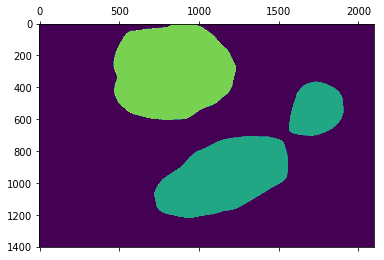

In [71]:
plt.matshow(np.array(img))

In [81]:
np.unique(img)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [99]:
arr = np.zeros(img.shape).astype(bool)
arr[img == 4] =  1

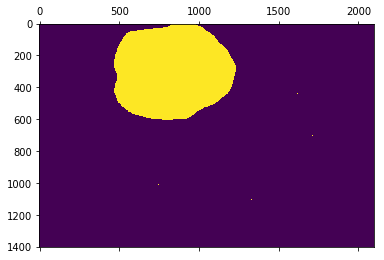

In [100]:
plt.matshow(arr)

In [37]:
from pyclouds.agreement import *

In [72]:
fn = 'Region2_DJF_Terra/Terra_CorrectedReflectance20161207_159-180_8-22.jpeg'

In [92]:
ans = annos_full[annos_full.fn == fn]

In [93]:
ans.user_name.unique()

array(['jkiliani'], dtype=object)

In [94]:
#ans = ans[ans.user_name == 'akio']

In [95]:
ans = ans[ans.tool_label == 'Gravel']

In [96]:
coords = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in ans.iterrows()]

In [97]:
true = fill_array_with_boxes(coords, (2100, 1400)).T

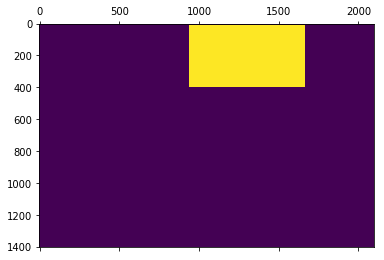

In [98]:
plt.matshow(true)

In [80]:
def iou_one_class_from_annos_and_arr(annos1, arr2, img_size, return_iou=False):
    """
    Returns the IoU from lists of [x, y, w, h] annotations.
    Image size must be given because arrays are created internally.
    If return_iou is True, the actual IoU score is computed,
    otherwise i, u will be returned.
    """
    arr1 = fill_array_with_boxes(annos1, img_size).T
    i = intersect_from_arrs(arr1, arr2)
    u = union_from_arrs(arr1, arr2)
    del arr1, arr2
    if return_iou:
        return i/u
    else:
        return i, u

In [64]:
img.shape

(1400, 2100)

In [101]:
iou_one_class_from_annos_and_arr(coords, arr, (2100, 1400), True)

0.16012317029950188

## Pixel-wise cross entropy?

In [14]:
from sklearn.metrics import log_loss
from scipy.stats import entropy

In [10]:
classes

['Sugar', 'Flower', 'Fish', 'Gravel']

In [49]:
true = np.array([0, 0, 1, 0])
pred = np.array([0, 0, 0, 1])

In [13]:
np.sum(true * np.log(pred), axis=0)

nan

In [17]:
entropy(true, pred)

inf

In [47]:
np.sum(np.abs(true - pred))/2

0.0

In [50]:
np.abs(true - pred)

array([0, 0, 1, 1])

In [82]:
a1 = np.zeros((4, 100, 100))
a2 = a1.copy()

In [83]:
a1[0, 10:20, 10:20] = 1
a2[0, 15:25, 10:20] = 1
a1[1, 50:60, 50:60] = 1
a2[1, 55:65, 50:60] = 1

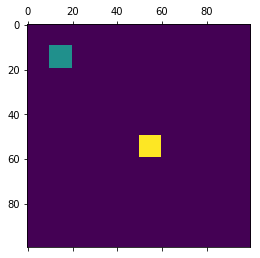

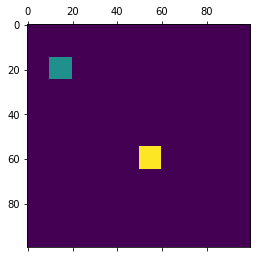

In [81]:
plt.matshow(a1)
plt.matshow(a2)

In [70]:
np.sum(np.abs(a1 - a2)) / np.sum(np.abs(a1+a2)>0)

0.6666666666666666

In [84]:
a1.shape

(4, 100, 100)

In [92]:
d = np.sum(np.abs(a1 - a2), axis=0)/2 

In [93]:
s = np.sum(a1+a2, 0) >0

In [95]:
np.sum(d) / np.sum(s)

0.3333333333333333

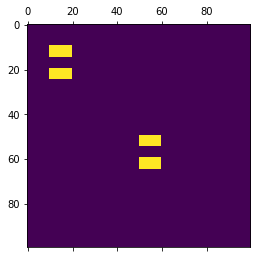

In [91]:
plt.matshow(s)

In [12]:
from pyclouds.imports import *
from pyclouds.agreement import *

In [3]:
annos_full = pd.read_pickle('../../preprocessed_data_original/annos_full.pkl')

In [4]:
s = 27145619

In [5]:
ans = annos_full[annos_full.subject_ids == s]

In [27]:
c = 'Sugar'

In [28]:
ans.user_name.unique()

array(['jkiliani', 'lpaccini', 'Serikov', 'DelaS'], dtype=object)

In [29]:
ans

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,subject_set,fn,datetime,x,y,width,height,tool_label,started_at,finished_at
33,129699509,jkiliani,1.83701e+06,f709b449ee5174006425,8073,Full dataset,13.11,2018-11-02 09:28:00 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-02 09:28:00,-75.1786,7.76124,1537.26,411.078,Fish,2018-11-02 09:27:02.317,2018-11-02 09:28:00.224
34,129699509,jkiliani,1.83701e+06,f709b449ee5174006425,8073,Full dataset,13.11,2018-11-02 09:28:00 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-02 09:28:00,25.4498,534.455,1211.82,580.219,Fish,2018-11-02 09:27:02.317,2018-11-02 09:28:00.224
35,129699509,jkiliani,1.83701e+06,f709b449ee5174006425,8073,Full dataset,13.11,2018-11-02 09:28:00 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-02 09:28:00,903.272,174.762,680.848,475.309,Sugar,2018-11-02 09:27:02.317,2018-11-02 09:28:00.224
13715,129727076,lpaccini,1.83006e+06,dd3ab09f3c57140838ac,8073,Full dataset,13.11,2018-11-02 12:52:38 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-02 12:52:38,NaN,NaN,NaN,NaN,NaN,2018-11-02 12:52:29.874,2018-11-02 12:52:37.844
25946,129749014,Serikov,1.83744e+06,f709b449ee5174006425,8073,Full dataset,13.11,2018-11-02 14:38:14 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-02 14:38:14,NaN,NaN,NaN,NaN,NaN,2018-11-02 14:38:09.812,2018-11-02 14:38:14.366
32571,130949701,DelaS,1.83625e+06,9c9fab0bf777e0982492,8073,Full dataset,13.11,2018-11-09 13:18:59 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-09 13:18:59,874.325,294.138,468.817,360.58,Sugar,2018-11-09 13:18:28.998,2018-11-09 13:18:54.665
32572,130949701,DelaS,1.83625e+06,9c9fab0bf777e0982492,8073,Full dataset,13.11,2018-11-09 13:18:59 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-09 13:18:59,1152.78,157.583,369.704,278.773,Sugar,2018-11-09 13:18:28.998,2018-11-09 13:18:54.665
32573,130949701,DelaS,1.83625e+06,9c9fab0bf777e0982492,8073,Full dataset,13.11,2018-11-09 13:18:59 UTC,NaN,NaN,...,Region2_DJF_Terra,Region2_DJF_Terra/Terra_CorrectedReflectance20...,2018-11-09 13:18:59,83,645.908,519.159,377.57,Gravel,2018-11-09 13:18:28.998,2018-11-09 13:18:54.665


In [72]:
a1 = ans[(ans.user_name == 'Serikov') & (ans.tool_label == c)]
a2 = ans[(ans.user_name == 'Serikov') & (ans.tool_label == c)]

In [73]:
annos1 = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in
          a1.iterrows()]
annos2 = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in
          a2.iterrows()]

In [79]:
def acc_one_class_from_annos(annos1, annos2, img_size):
    """
    Returns the IoU from lists of [x, y, w, h] annotations.
    Image size must be given because arrays are created internally.
    If return_iou is True, the actual IoU score is computed,
    otherwise i, u will be returned.
    """
    arr1 = fill_array_with_boxes(annos1, img_size).astype(int)
    arr2 = fill_array_with_boxes(annos2, img_size).astype(int)
    #pdb.set_trace()
    
    d = np.sum(np.abs(arr1 - arr2))
    s = np.sum((arr1 + arr2) > 0)
    
    del arr1, arr2
    
    return d, s

In [75]:
annos2

[]

In [76]:
acc_one_class_from_annos(annos1, annos2, (2100, 1400))

(0, 0, nan)

In [64]:
acc_one_class_from_annos(annos1, annos2, (2100, 1400))

(323000, 323000, 1.0)

In [42]:
%debug

> <ipython-input-40-cafecff0bba5>(11)acc_one_class_from_annos()
      9     arr2 = fill_array_with_boxes(annos2, img_size)
     10 
---> 11     d = np.sum(np.abs(arr1 - arr2), axis=0) / 2
     12     s = np.sum(arr1 + arr2, 0) > 0
     13 

ipdb> arr1
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
ipdb> 
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
ipdb> arr2
array([[False, False, False, ...

In [81]:
IMGPATH = '/local/S.Rasp/cloud-classification/'

In [83]:
from pyclouds.plot import *

In [127]:
def acc_by_class_and_user(subj_id, annos_df, user=None, err=None, tot=None, img_size=(2100, 1400)):
    ans = annos_df[annos_df.subject_ids == subj_id]
    users = ans.user_name.unique()

    if err is None: err = defaultdict(int)
    if tot is None: tot = defaultdict(int)
    
    if (user is not None) and (user not in users):
        return err, tot
    
    for u in combinations(users, 2) if user is None else [u for u in users if u != user]:
        if user is None: u1, u2 = u
        else:            u1 = user; u2 = u
        for c in classes:
            a1 = ans[(ans.user_name == u1) & (ans.tool_label == c)]
            a2 = ans[(ans.user_name == u2) & (ans.tool_label == c)]

            annos1 = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in
                      a1.iterrows()]
            annos2 = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in
                      a2.iterrows()]
            e, t = acc_one_class_from_annos(annos1, annos2, img_size)

            err[c] += e; tot[c] += t

    return err, tot

In [87]:
subjs = annos_full.subject_ids.unique()

In [106]:
s = subjs[1007]

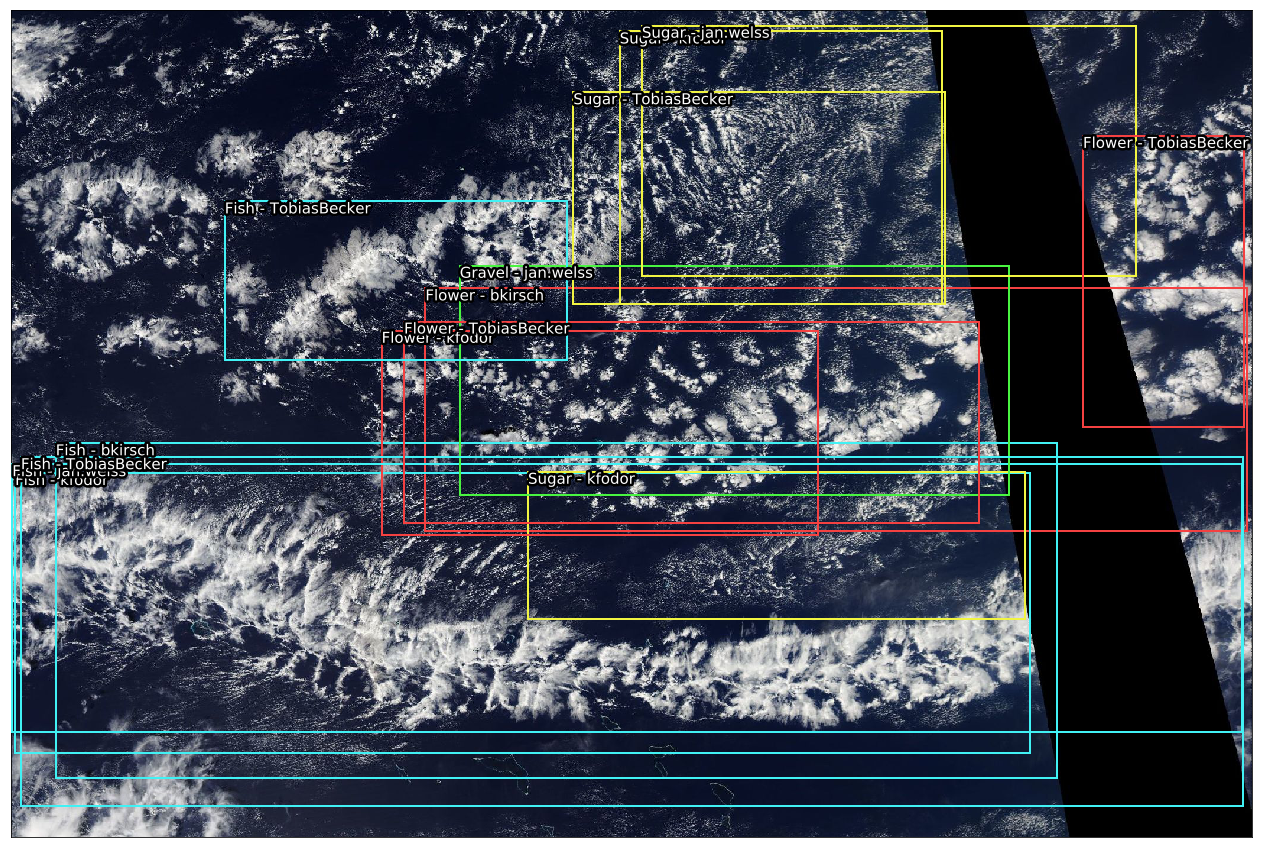

In [107]:
plot_img_with_annos(s, IMGPATH, annos_full)

In [131]:
err, tot = acc_by_class_and_user(s, annos_full, 'raspstephan')

In [132]:
err, tot

(defaultdict(int, {}), defaultdict(int, {}))

In [111]:
users = ans.user_name.unique()

In [112]:
users

array(['jkiliani', 'lpaccini', 'Serikov', 'DelaS'], dtype=object)

In [115]:
for u in combinations(users, 2): print(u)

('jkiliani', 'lpaccini')
('jkiliani', 'Serikov')
('jkiliani', 'DelaS')
('lpaccini', 'Serikov')
('lpaccini', 'DelaS')
('Serikov', 'DelaS')


In [139]:
def acc_by_class_and_user_with_arr(subj_id, annos_df, arr_dir=None, err=None, tot=None, img_size=(2100, 1400)):
    ans = annos_df[annos_df.subject_ids == subj_id]
    users = ans.user_name.unique()

    if err is None: err = defaultdict(int)
    if tot is None: tot = defaultdict(int)
        
    mask = np.array(Image.open(arr_dir + f'{subj_id}.png'))

    for u1 in users:
        for i, c in enumerate(classes):
            arr = mask == i+1
            a1 = ans[(ans.user_name == u1) & (ans.tool_label == c)]

            annos1 = [[int(r[c]) for c in ['x', 'y', 'width', 'height']] for i, r in
                      a1.iterrows()]
            e, t = acc_one_class_from_annos_and_arr(annos1, arr, img_size)

            err[c] += e
            tot[c] += t

    return err, tot


def acc_one_class_from_annos_and_arr(annos1, arr2, img_size):
    """
    Returns the IoU from lists of [x, y, w, h] annotations.
    Image size must be given because arrays are created internally.
    If return_iou is True, the actual IoU score is computed,
    otherwise i, u will be returned.
    """
    arr1 = fill_array_with_boxes(annos1, img_size).astype(int).T

    d = np.sum(np.abs(arr1 - arr2))
    s = np.sum((arr1 + arr2) > 0)

    del arr1, arr2

    return d, s

In [134]:
pred_dir = '/project/meteo/work/S.Rasp/cloud-classification/ml/seg_valid/'

In [142]:
err, tot = acc_by_class_and_user_with_arr(s, annos_full, pred_dir)

In [143]:
for c in classes:
    print(c, (1-err[c]/tot[c]))

Sugar 0.05785302750196253
Flower 0.0692292674629208
Fish 0.579116303737859
Gravel 0.0


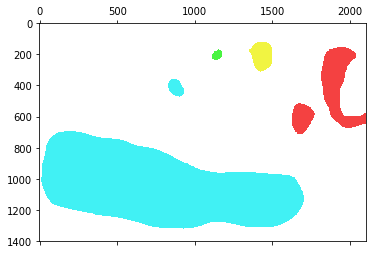

In [141]:
fig, ax = plt.subplots()
arr = np.array(Image.open(pred_dir + f'{s}.png'))
for i, c in enumerate(classes):
    a = arr == i+1
    ax.matshow(a,cmap = mpl.colors.ListedColormap(['none', np.array(l2c[c]) / 255]))